In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ERROR: Error in parse(text = x, srcfile = src): <text>:5:8: unexpected symbol
4: 
5: import numpy
          ^


In [3]:
# Cargar librerias requeridas
library(TSstudio)
library(dplyr)
library(lubridate)
library(plotly)
library(forecast)
#install.packages("Metrics")
library(Metrics)
library(astsa)
library(quantmod)
library(xts)
library(dygraphs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy



Attaching package: ‘astsa’


The following object is masked from ‘package:forecast’:

    gas


Loading required package: xts



In [4]:
#Incluimos las librerías de modelamiento y manejo de datos.
install.packages('MTS')
install.packages("devtools")
library(devtools)
library(fpp3)
library(urca)
library(vars)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ──────────────────────────────────────────── fpp3 1.0.0 ──

✔ tibble      3.2.1     ✔ feasts      0.3.2
✔ tidyr       1.3.1     ✔ fable       0.3.4
✔ tsibble     1.1.5     ✔ fabletools  0.4.2
✔ tsibbledata 0.4.1     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ fabletools::accuracy() masks Metrics::accuracy(), forecast::accuracy()
✖ lubridate::date()      masks base::date()
✖ plotly::filter()       masks dplyr::filter(), stats::filter()
✖ xts::first()           masks dplyr::first()
✖ tsibble::index()       masks zoo::index()
✖ tsibble::intersect()   masks base::intersect()
✖ tsibble::interval()    masks lubridate::interval()

In [5]:
install.packages("MTS_VERSION.tar.gz",repos=NULL,type="source")
library(MTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("MTS_VERSION.tar.gz", repos = NULL, type = "source"):
“installation of package ‘MTS_VERSION.tar.gz’ had non-zero exit status”

Attaching package: ‘MTS’


The following object is masked from ‘package:vars’:

    VAR


The following object is masked from ‘package:fable’:

    VAR




**0. Cargar y entendimiento información**

In [6]:
# Cargar los datos de precios de cierre de Meta

# Definir fechas de inicio y fin
start<-format(as.Date("2019-04-22"),"%Y-%m-%d")
end<-format(as.Date("2022-12-31"),"%Y-%m-%d")

precios <-function(simbolo)  #para evitar posibles confusiones del código, omitimos las tildes.
{
  ##Obtener precios stocks de Yahoo Finance
  datos <- getSymbols(simbolo, auto.assign = FALSE, from=start, to=end)
  ## Elimar faltantes:
  datos<-na.omit(datos)
  ##mantener columnas con precios cierre y volumenes: columnas 4 y 5:
  datos <- datos[,4]
  ##Para hacer los datos accesibles en el global environment:
  assign(simbolo, datos, envir = .GlobalEnv)
}

In [7]:
# Importar series de interes

# Importemos RYLD, TSLA, TM y GM 

precios("RYLD") 
precios("TSLA") 
precios("TM")  
precios("GM")  

##Llamamos por facilidad a nuestros activos:
in1= `RYLD`
in2= `TSLA`
in3= `TM`
in4= `GM`

In [8]:
# Unir las cuatro series y graficarlas 

# Unir las series en un solo xts
combined <- merge(in1, in2, in3, in4)

# Especificar nombres
colnames(combined) <- c("in1", "in2", "in3", "in4")

# Crear gráfico 
library(dygraphs)
dygraph(combined, main = "Comparación de series") %>%
  dyAxis("y", label = "Prices") %>%
  dyOptions(colors = RColorBrewer::brewer.pal(4, "Set1"))


HTML widgets cannot be represented in plain text (need html)

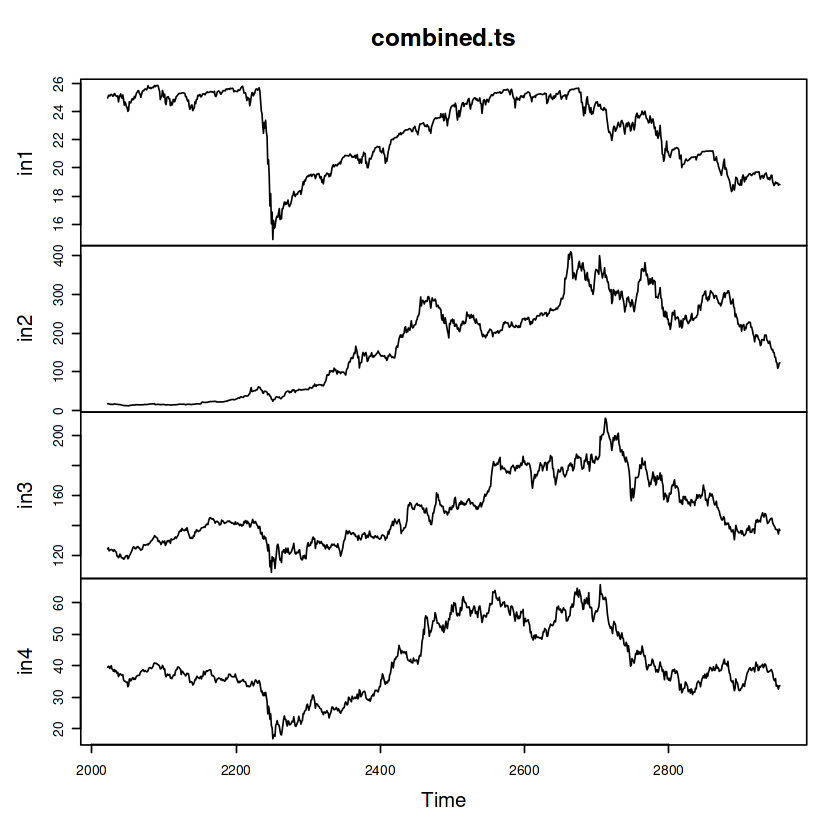

In [9]:
# Debemos visualizar los datos por serie

combined.ts=ts(combined, start=c(2019,4), frequency=1)
plot(combined.ts)
     

In [42]:
# Ajustar formato de las fechas
prices_varios <- as.xts(combined, dateFormat = "Date")
prices_varios_indexado <- fortify.zoo(prices_varios)
colnames(prices_varios_indexado)<-c("Index", "RYLD", "TSLA", "TM" , "GM")
head(prices_varios_indexado)

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-04-22,24.995,17.51667,124.16,39.50
2,2019-04-23,25.157,17.59333,124.94,39.83
3,2019-04-24,25.189,17.24400,122.88,39.72
4,2019-04-25,25.130,16.50867,123.19,39.11
5,2019-04-26,25.225,15.67600,123.62,39.68
6,2019-04-29,25.250,16.09800,123.81,40.01


In [43]:
# Partir la serie en training y test

h <- round(nrow(prices_varios_indexado)*0.05, digits = 0 )
print(paste("Cantidad de fechas usadas para testing: ",h))
prices_varios_indexado_train <- prices_varios_indexado[1:(nrow(prices_varios_indexado) - h), ]
prices_varios_indexado_test<- prices_varios_indexado[(nrow(prices_varios_indexado) - h + 1):nrow(prices_varios_indexado), ]

[1] "Cantidad de fechas usadas para testing:  44"


**1. Modelo VAR usando libreria VARS**

**1.1. Preprocesamiento**

In [44]:
head(prices_varios_indexado)

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-04-22,24.995,17.51667,124.16,39.50
2,2019-04-23,25.157,17.59333,124.94,39.83
3,2019-04-24,25.189,17.24400,122.88,39.72
4,2019-04-25,25.130,16.50867,123.19,39.11
5,2019-04-26,25.225,15.67600,123.62,39.68
6,2019-04-29,25.250,16.09800,123.81,40.01


In [47]:
# Identificar nivel regresión de la serie

nivelka=VARselect(combined.ts, lag.max = 7, type = "const")
nivelka$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      1      1      3

El orden autoregresivo de acuerdo con la prueba de criterio de información puede ser 1 o 3. Se elige 3, este sera el orden de que indicará en la función de cointegración.

In [48]:
# Prueba de cointegración

#Aplicamos la prueba de Johansen para la identificación de relaciones lineales entre las series, lo que nos indica la condición de cointegración.

johatest=ca.jo(combined.ts, type = "trace", K=3, ecdet ="none", spec = "longrun") #k=1 de acuerdo a los resultados de la prueba anterior
summary(johatest)     


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.025178838 0.013551622 0.005454097 0.001665807

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  1.55  6.50  8.18 11.65
r <= 2 |  6.64 15.66 17.95 23.52
r <= 1 | 19.33 28.71 31.52 37.22
r = 0  | 43.04 45.23 48.28 55.43

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            in1.l3      in2.l3       in3.l3     in4.l3
in1.l3  1.00000000  1.00000000  1.000000000 1.00000000
in2.l3  0.04047053  0.01420505 -0.006160056 0.07517971
in3.l3 -0.19656578  0.11367107 -0.016571013 0.04088028
in4.l3 -0.13677494 -0.47698175 -0.007522554 0.33936225

Weights W:
(This is the loading matrix)

           in1.l3       in2.l3       in3.l3        in4.l3
in1.d -0.00167326 -0.005669915 -0.003600594 -0.0005984274
in2.d -0.15022102  0.046282162  0.103842662 -0.0217639916
in3.d  0

De acuerdo con los resultados de la prueba de Johanse, se encuentra que no existe suficientes información para rechazar la hipotesis nula de no cointegración entre las variables, por lo cual se concluye que no existe cointegración entre las variables int1, int2, int3, y int4. Teniendo en cuenta que las series no está cointegradas, esto significa que no existe un estado estable común a largo plazo, por lo cual no se recomienda la aplicación de modelos VECM ya que dentro de sus supuesto esta la cointegración de las variables, razón por la cual se aplicarán modelos VAR.

In [49]:
head(combined)

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-04-22,24.995,17.51667,124.16,39.50
2,2019-04-23,25.157,17.59333,124.94,39.83
3,2019-04-24,25.189,17.24400,122.88,39.72
4,2019-04-25,25.130,16.50867,123.19,39.11
5,2019-04-26,25.225,15.67600,123.62,39.68
6,2019-04-29,25.250,16.09800,123.81,40.01


In [51]:
# Diferenciación de las series

# Importar libreria necesaria
library(tseries)

# Diferencia por serie
adf.test(combined[,2])
adf.test(combined[,3])
adf.test(combined[,4])
adf.test(combined[,5])


	Augmented Dickey-Fuller Test

data:  combined[, 2]
Dickey-Fuller = -1.945, Lag order = 9, p-value = 0.6016
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  combined[, 3]
Dickey-Fuller = -1.9481, Lag order = 9, p-value = 0.6003
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  combined[, 4]
Dickey-Fuller = -1.1193, Lag order = 9, p-value = 0.9195
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  combined[, 5]
Dickey-Fuller = -1.3697, Lag order = 9, p-value = 0.8451
alternative hypothesis: stationary


De acuerdo con las pruebas de Augmented Dickey-Fuller no existe suficiente información estadística para rechazar la hipotesis nula de no estacionariedad de las series, por lo cual se concluye que las series son no estacionarias.

In [52]:
head(combined)

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-04-22,24.995,17.51667,124.16,39.50
2,2019-04-23,25.157,17.59333,124.94,39.83
3,2019-04-24,25.189,17.24400,122.88,39.72
4,2019-04-25,25.130,16.50867,123.19,39.11
5,2019-04-26,25.225,15.67600,123.62,39.68
6,2019-04-29,25.250,16.09800,123.81,40.01


In [60]:
head(diff(combined.ts))

,in1,in2,in3,in4
2023,0.16199875,0.07666588,0.7799988,0.3300018
2024,0.03199959,-0.34933281,-2.0600052,-0.1100006
2025,-0.05900002,-0.73533249,0.3100052,-0.6100006
2026,0.09500122,-0.83266735,0.4300003,0.5699997
2027,0.02499962,0.42199993,0.1899948,0.3299980
2028,-0.03899956,-0.18533230,-0.2099991,-1.0599976


In [61]:
library(tseries)

# Filtrar solo columnas numéricas y aplicar diferencias
combined_diff <- diff(combined.ts)

# ADF sobre las diferencias (ajusta los índices si es necesario)
adf.test(combined_diff[,1])
adf.test(combined_diff[,2])
adf.test(combined_diff[,3])
adf.test(combined_diff[,4])


Warning message in adf.test(combined_diff[, 1]):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  combined_diff[, 1]
Dickey-Fuller = -8.0814, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(combined_diff[, 2]):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  combined_diff[, 2]
Dickey-Fuller = -9.2478, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(combined_diff[, 3]):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  combined_diff[, 3]
Dickey-Fuller = -10.768, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(combined_diff[, 4]):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  combined_diff[, 4]
Dickey-Fuller = -9.895, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


De acuerdo con las pruebas de Augmented Dickey-Fuller existe suficiente información estadística para rechazar la hipotesis nula de no estacionariedad de las series, por lo cual se concluye que las series diferenciadas a un período son estacionarias.

**1.2. Aplicación Modelo VAR**

In [62]:
# Determinar el nivel de lags para la serie diferenciada

# En la librería de VAR, la función que permite identificar el orden regresivo es la función de VARselect(). Se elige el máximo de rezagos de lag.max=7.
nivelk=VARselect(combined_diff, lag.max = 7, type = "const")
nivelk$selection
     

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      1      2

Dado que el orden mínimo es 2, se elige p = 2

In [63]:
# Aplicar modelo de regresión VAR

# Cargar librería VAR
library(vars)

# Entrenar el modelo
m0=vars::VAR(combined_diff, p=2)

# Imprimir resultados de desempeño del modelo
summary(m0)


VAR Estimation Results:
Endogenous variables: in1, in2, in3, in4 
Deterministic variables: const 
Sample size: 930 
Log Likelihood: -6346.802 
Roots of the characteristic polynomial:
0.5629 0.412 0.2887 0.2887 0.2812 0.2812 0.1802 0.1441
Call:
vars::VAR(y = combined_diff, p = 2)


Estimation results for equation in1: 
in1 = in1.l1 + in2.l1 + in3.l1 + in4.l1 + in1.l2 + in2.l2 + in3.l2 + in4.l2 + const 

         Estimate Std. Error t value Pr(>|t|)    
in1.l1 -1.387e-01  4.146e-02  -3.345 0.000855 ***
in2.l1  3.553e-04  1.149e-03   0.309 0.757293    
in3.l1 -1.614e-03  4.517e-03  -0.357 0.721017    
in4.l1  1.487e-02  1.012e-02   1.470 0.141930    
in1.l2  2.743e-01  4.161e-02   6.593 7.27e-11 ***
in2.l2 -2.104e-03  1.150e-03  -1.830 0.067595 .  
in3.l2 -7.818e-05  4.512e-03  -0.017 0.986179    
in4.l2 -1.894e-02  1.009e-02  -1.876 0.060927 .  
const  -5.814e-03  8.501e-03  -0.684 0.494229    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error:

La serie int4 responde variaciones en períodos anteriores a int1 e int2. Existen correlaciones moderadas entree las variables int1 y int4, int3 y int4, e int1 y int3.

**2. Modelo VARS con libreria MTS**

**2.1. Preprocesamiento**

In [64]:
# Determinar orden regresivo
VARorder(combined_diff)

selected order: aic =  2 
selected order: bic =  0 
selected order: hq =  2 
Summary table:  
       p    AIC    BIC     HQ    M(p) p-value
 [1,]  0 2.4738 2.4738 2.4738  0.0000  0.0000
 [2,]  1 2.4539 2.5369 2.4856 49.5841  0.0000
 [3,]  2 2.4059 2.5720 2.4692 74.9077  0.0000
 [4,]  3 2.4311 2.6802 2.5261  8.2821  0.9400
 [5,]  4 2.4365 2.7687 2.5632 26.0077  0.0539
 [6,]  5 2.4510 2.8663 2.6094 17.8070  0.3353
 [7,]  6 2.4647 2.9629 2.6547 18.5089  0.2949
 [8,]  7 2.4577 3.0390 2.6793 36.7762  0.0023
 [9,]  8 2.4651 3.1294 2.7184 23.8195  0.0935
[10,]  9 2.4620 3.2094 2.7471 32.9700  0.0075
[11,] 10 2.4752 3.3056 2.7919 18.5853  0.2908
[12,] 11 2.4854 3.3989 2.8338 21.0232  0.1776
[13,] 12 2.5054 3.5019 2.8854 12.5226  0.7073
[14,] 13 2.5261 3.6057 2.9379 11.7476  0.7612


La prueba señala que se debería utilizar un orden regresivo de p=2.

**2.2. Implementación del modelo**

In [65]:
# Aplicar el modelo
m1=MTS::VAR(combined_diff,2)

Constant term: 
Estimates:  -0.005813678 0.1381135 0.009695115 -0.004087747 
Std.Error:  0.008501149 0.2660752 0.07498849 0.03548096 
AR coefficient matrix 
AR( 1 )-matrix 
        [,1]      [,2]     [,3]    [,4]
[1,] -0.1387  0.000355 -0.00161  0.0149
[2,]  1.1687 -0.036652  0.00362 -0.3614
[3,] -1.0787  0.013569  0.01033  0.0919
[4,] -0.0592  0.009652 -0.00722 -0.0113
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0415 0.00115 0.00452 0.0101
[2,] 1.2978 0.03597 0.14138 0.3166
[3,] 0.3658 0.01014 0.03984 0.0892
[4,] 0.1731 0.00480 0.01885 0.0422
AR( 2 )-matrix 
      [,1]     [,2]      [,3]    [,4]
[1,] 0.274 -0.00210 -7.82e-05 -0.0189
[2,] 2.081 -0.00173 -3.53e-02  0.0181
[3,] 0.217 -0.00935  8.48e-03  0.1364
[4,] 0.419 -0.00825 -3.36e-02 -0.0123
standard error 
       [,1]    [,2]    [,3]   [,4]
[1,] 0.0416 0.00115 0.00451 0.0101
[2,] 1.3022 0.03599 0.14122 0.3159
[3,] 0.3670 0.01014 0.03980 0.0890
[4,] 0.1737 0.00480 0.01883 0.0421
  
Residuals cov-mtx: 
           [,1] 

La variable int2 no esta siendo bien explicada, mientras que la variable int1 influeye autoregresivamente sobre si misma y las variables int3 e int4.

Ljung-Box Statistics:  
          m       Q(m)     df    p-value
 [1,]   1.000     0.179   4.000     1.00
 [2,]   2.000     0.855  20.000     1.00
 [3,]   3.000     6.491  36.000     1.00
 [4,]   4.000    34.369  52.000     0.97
 [5,]   5.000    51.823  68.000     0.93
 [6,]   6.000    68.043  84.000     0.90
 [7,]   7.000   102.567 100.000     0.41
 [8,]   8.000   129.071 116.000     0.19
 [9,]   9.000   169.167 132.000     0.02
[10,]  10.000   184.209 148.000     0.02
[11,]  11.000   201.709 164.000     0.02
[12,]  12.000   212.929 180.000     0.05
[13,]  13.000   223.775 196.000     0.08
[14,]  14.000   246.896 212.000     0.05
[15,]  15.000   271.583 228.000     0.03
[16,]  16.000   289.971 244.000     0.02
[17,]  17.000   313.745 260.000     0.01
[18,]  18.000   333.728 276.000     0.01
[19,]  19.000   373.977 292.000     0.00
[20,]  20.000   382.449 308.000     0.00
[21,]  21.000   397.608 324.000     0.00
[22,]  22.000   409.376 340.000     0.01
[23,]  23.000   428.760 356.000  

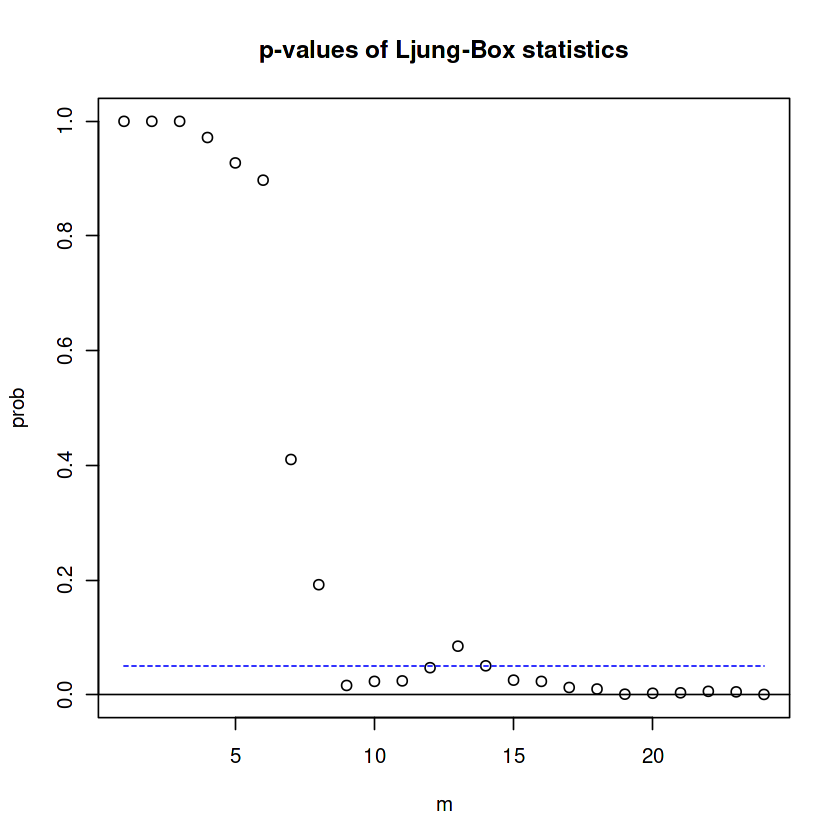

In [66]:
# Revisar calidad del modelo aplicando la Prueba de Ljung-Box

resi=m1$residuals
mq(resi, adj=12) # Usar grados de libertad del modelo 36

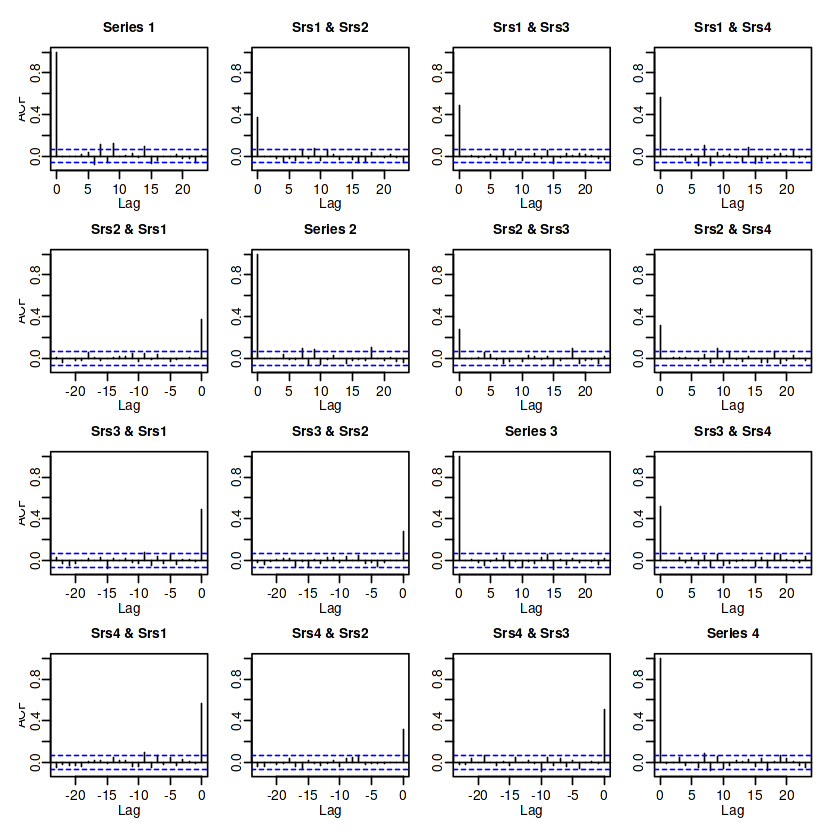

In [67]:

# Revisar los rezagos de los residuales, en búsqueda de rezagos no capturados por el modelo
acf(resi) 

In [68]:
# Simplificación del modelo

m2=refVAR(m1,thres = 1.96)

Constant term: 
Estimates:  0 0 0 0 
Std.Error:  0 0 0 0 
AR coefficient matrix 
AR( 1 )-matrix 
       [,1] [,2] [,3] [,4]
[1,] -0.108    0    0    0
[2,]  0.000    0    0    0
[3,] -0.706    0    0    0
[4,]  0.000    0    0    0
standard error 
       [,1] [,2] [,3] [,4]
[1,] 0.0321    0    0    0
[2,] 0.0000    0    0    0
[3,] 0.2791    0    0    0
[4,] 0.0000    0    0    0
AR( 2 )-matrix 
      [,1] [,2]    [,3]    [,4]
[1,] 0.264    0  0.0000 -0.0225
[2,] 0.000    0  0.0000  0.0000
[3,] 0.000    0  0.0000  0.1511
[4,] 0.336    0 -0.0396  0.0000
standard error 
       [,1] [,2]   [,3]    [,4]
[1,] 0.0386    0 0.0000 0.00945
[2,] 0.0000    0 0.0000 0.00000
[3,] 0.0000    0 0.0000 0.06909
[4,] 0.1517    0 0.0178 0.00000
  
Residuals cov-mtx: 
                      resi                    
     0.06676625  0.7748696 0.2886429 0.1575905
resi 0.77486956 65.4370454 4.9776624 2.7305345
     0.28864286  4.9776624 5.1900296 1.2648570
     0.15759051  2.7305345 1.2648570 1.1654655
  
det(

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      18.5     7.0     1.00
 [2,]   2.0      30.3    23.0     0.14
 [3,]   3.0      36.6    39.0     0.58
 [4,]   4.0      64.4    55.0     0.18
 [5,]   5.0      79.7    71.0     0.22
 [6,]   6.0      96.2    87.0     0.23
 [7,]   7.0     131.7   103.0     0.03
 [8,]   8.0     160.8   119.0     0.01
 [9,]   9.0     204.7   135.0     0.00
[10,]  10.0     221.1   151.0     0.00
[11,]  11.0     238.9   167.0     0.00
[12,]  12.0     250.0   183.0     0.00
[13,]  13.0     261.2   199.0     0.00
[14,]  14.0     285.4   215.0     0.00
[15,]  15.0     309.8   231.0     0.00
[16,]  16.0     327.8   247.0     0.00
[17,]  17.0     353.4   263.0     0.00
[18,]  18.0     372.5   279.0     0.00
[19,]  19.0     414.4   295.0     0.00
[20,]  20.0     423.0   311.0     0.00
[21,]  21.0     439.0   327.0     0.00
[22,]  22.0     450.3   343.0     0.00
[23,]  23.0     470.0   359.0     0.00
[24,]  24.0     510.3   375.0     0.00


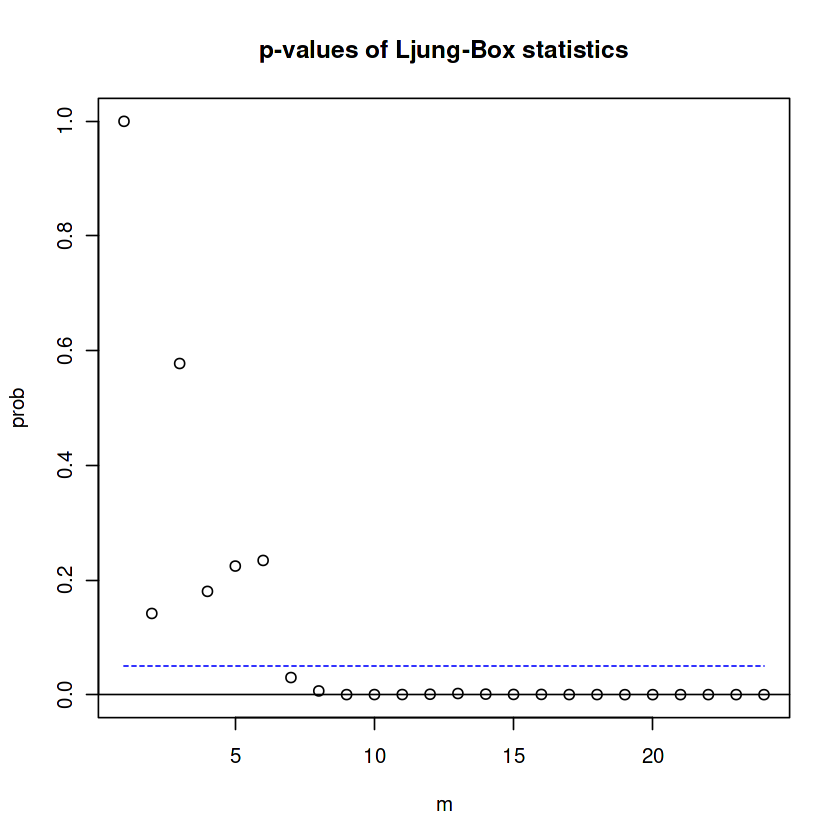

In [69]:
# Revisar calidad del modelo simplificado aplicando la Prueba de Ljung-Box

resi2=m2$residuals
mq(resi2, adj=9) # Usar grados de libertad del modelo 33

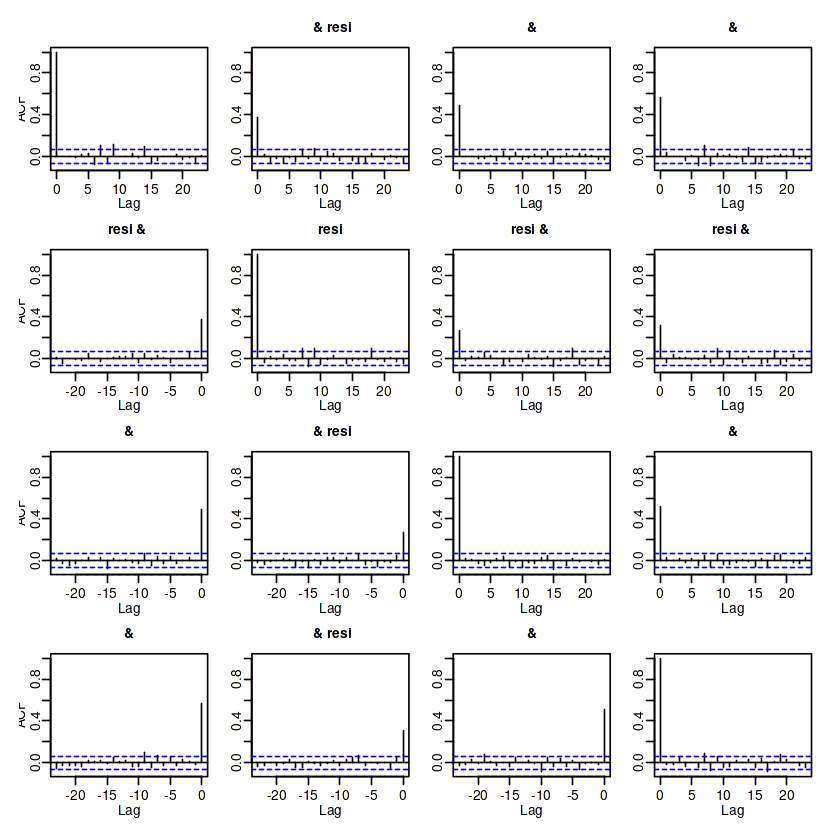

In [70]:
# Revisar los rezagos de los residuales, en búsqueda de rezagos no capturados por el modelo
acf(resi2) 

[1] "Covariance matrix:"
       in1    in2   in3   in4
in1 0.0668  0.776 0.289 0.158
in2 0.7764 65.494 4.982 2.734
in3 0.2890  4.982 5.195 1.266
in4 0.1577  2.734 1.266 1.167
CCM at lag:  0 
      [,1]  [,2]  [,3]  [,4]
[1,] 1.000 0.371 0.491 0.565
[2,] 0.371 1.000 0.270 0.313
[3,] 0.491 0.270 1.000 0.514
[4,] 0.565 0.313 0.514 1.000
Simplified matrix: 
CCM at lag:  1 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  2 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  3 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  4 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  5 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  6 
- . . - 
. . . . 
. . . . 
. . . . 
CCM at lag:  7 
+ + . + 
. + . . 
. . . . 
+ + . + 
CCM at lag:  8 
. . . - 
. - . . 
. . . . 
. . . - 
CCM at lag:  9 
+ + . . 
. + . + 
+ . . . 
+ . . . 
CCM at lag:  10 
. . . . 
. . . . 
. . - . 
. . - . 
CCM at lag:  11 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  12 
. . . . 
. . . . 
. . . . 
. . . . 
CCM at lag:  13 


 1


Hit Enter for p-value plot of individual ccm:  


 0.005


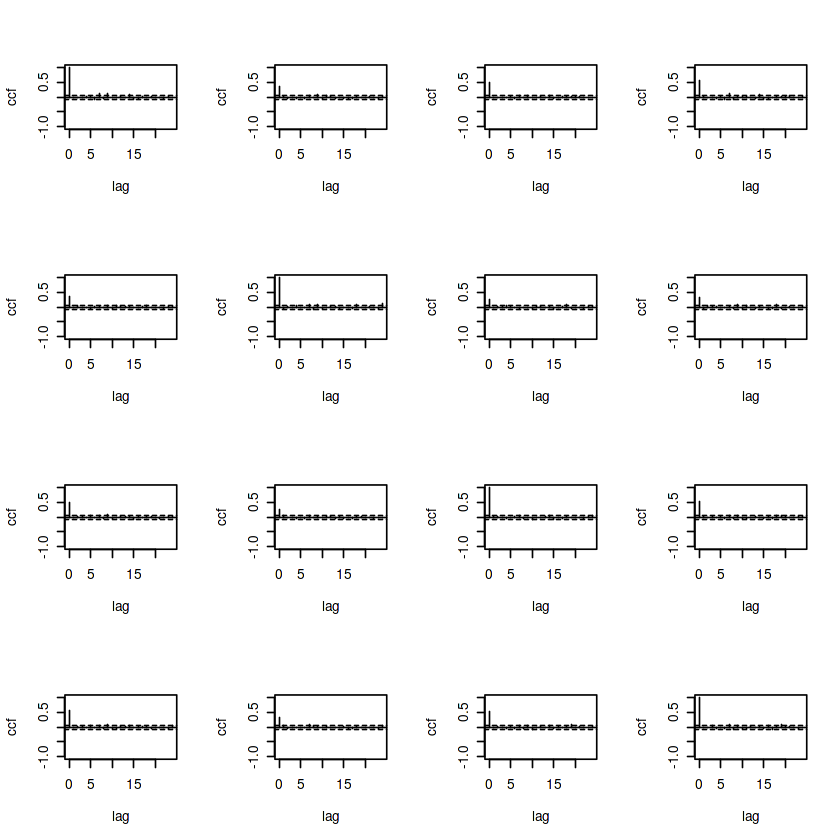

Hit Enter to compute MQ-statistics: 
Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      18.5     7.0     1.00
 [2,]   2.0      30.3    23.0     0.14
 [3,]   3.0      36.6    39.0     0.58
 [4,]   4.0      64.4    55.0     0.18
 [5,]   5.0      79.7    71.0     0.22
 [6,]   6.0      96.2    87.0     0.23
 [7,]   7.0     131.7   103.0     0.03
 [8,]   8.0     160.8   119.0     0.01
 [9,]   9.0     204.7   135.0     0.00
[10,]  10.0     221.1   151.0     0.00
[11,]  11.0     238.9   167.0     0.00
[12,]  12.0     250.0   183.0     0.00
[13,]  13.0     261.2   199.0     0.00
[14,]  14.0     285.4   215.0     0.00
[15,]  15.0     309.8   231.0     0.00
[16,]  16.0     327.8   247.0     0.00
[17,]  17.0     353.4   263.0     0.00
[18,]  18.0     372.5   279.0     0.00
[19,]  19.0     414.4   295.0     0.00
[20,]  20.0     423.0   311.0     0.00
[21,]  21.0     439.0   327.0     0.00
[22,]  22.0     450.3   343.0     0.00
[23,]  23.0     470.0   359.0     0.00
[24

 1


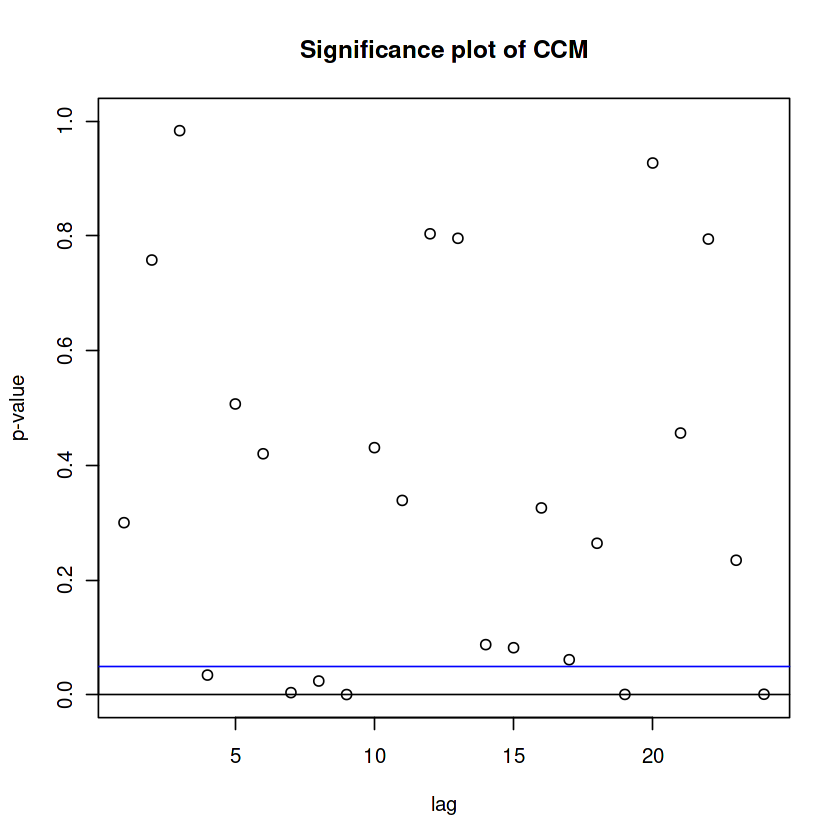

Hit Enter to obtain residual plots: 


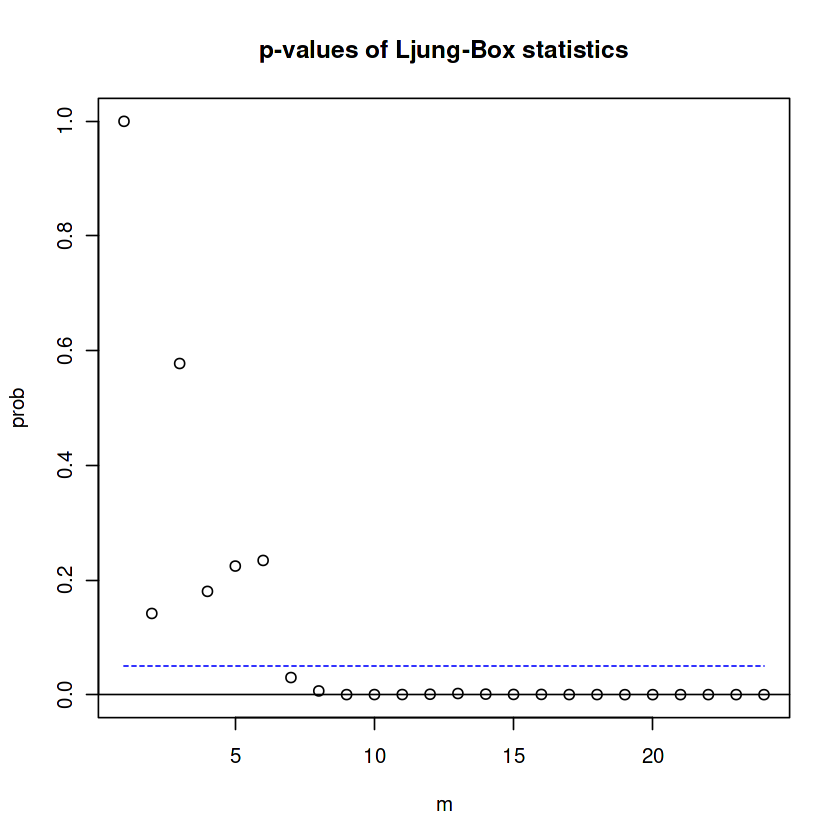

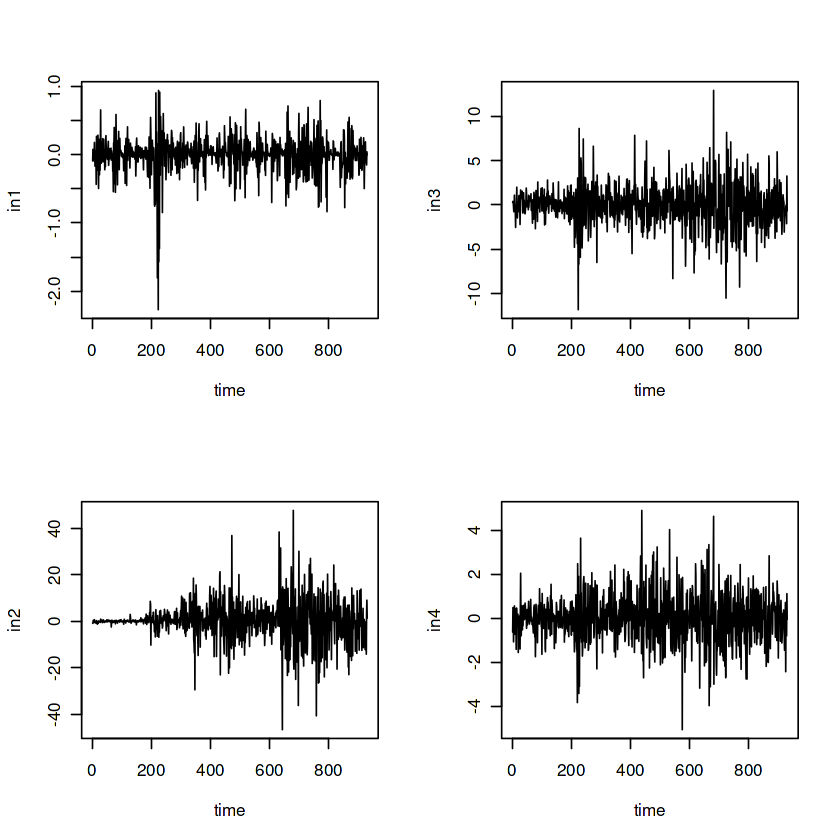

In [72]:
# Aplicamos la función de diagnóstico al modelo terminal, esto, para permitir observar si existe una dependencia inmediata en las series.
MTSdiag(m2, adj=9) 

**Análisis Impulso - Respuesta**

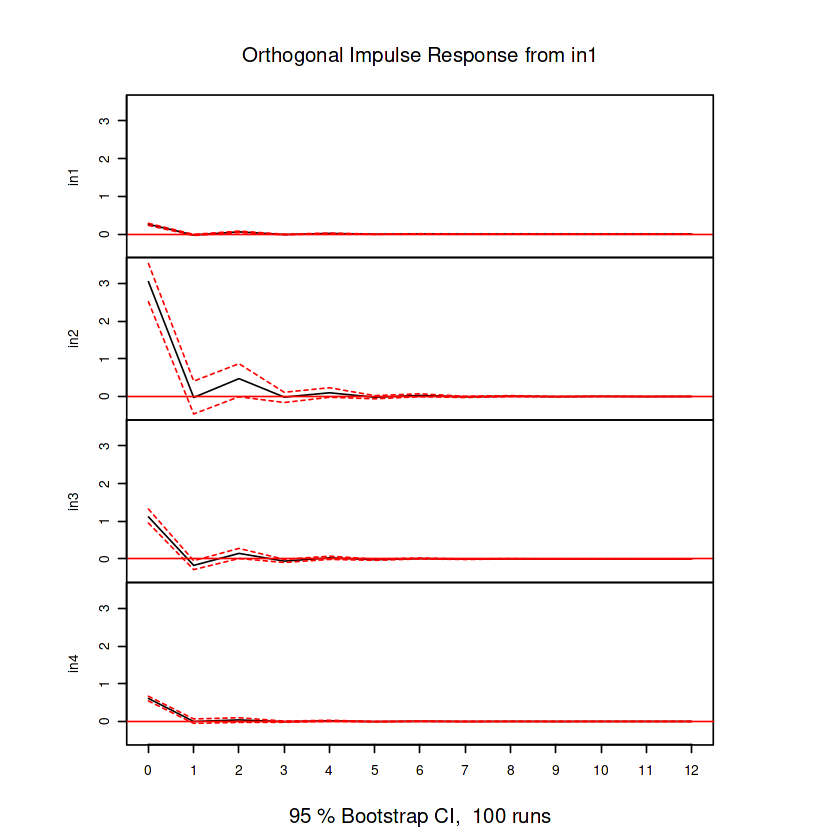

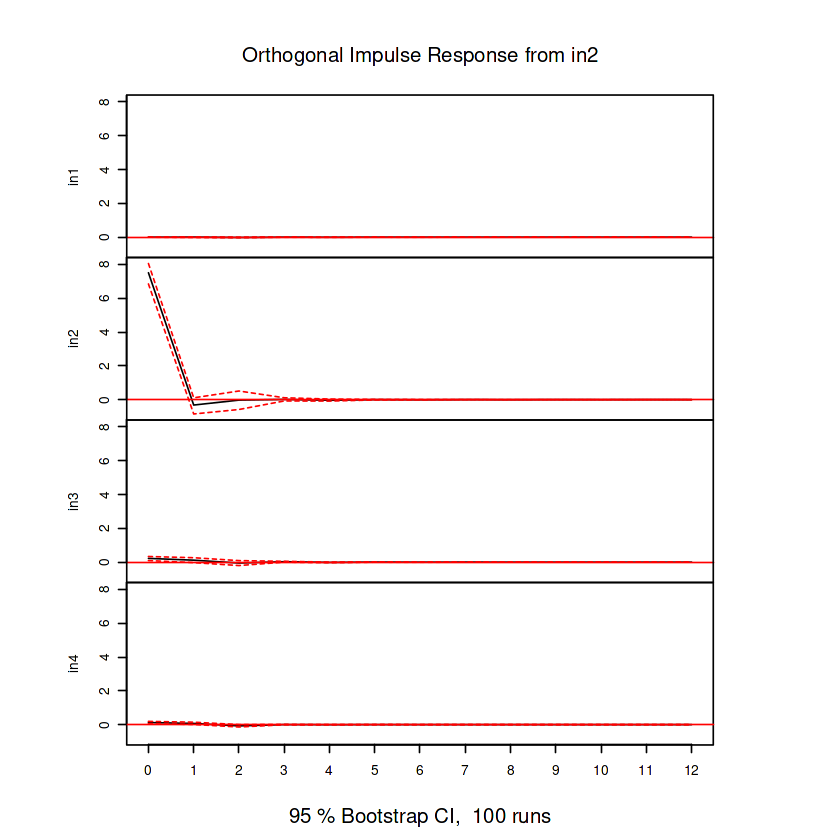

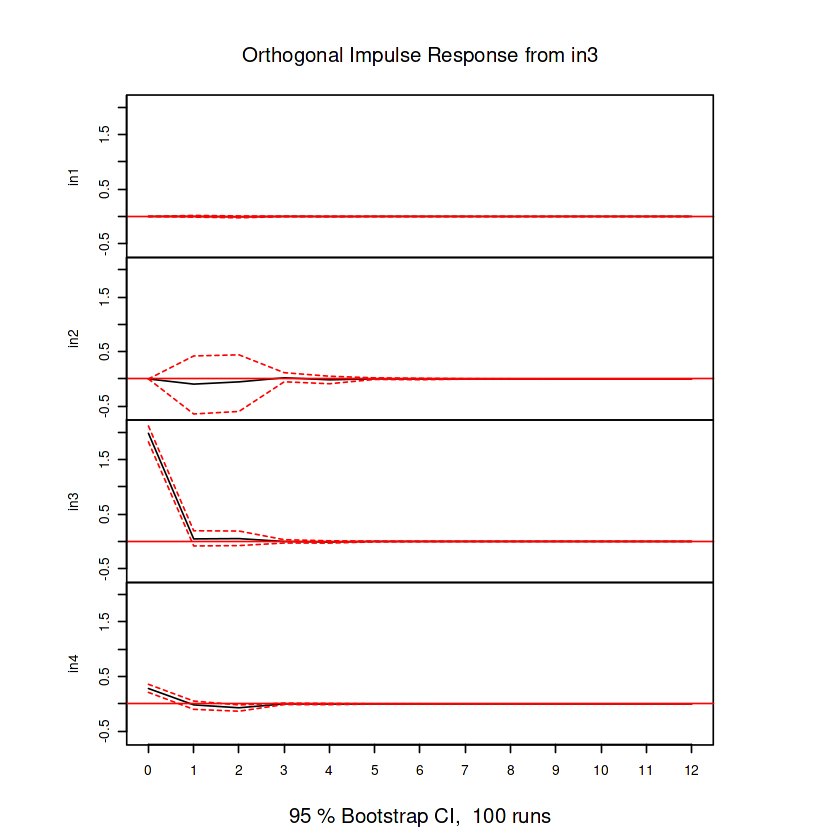

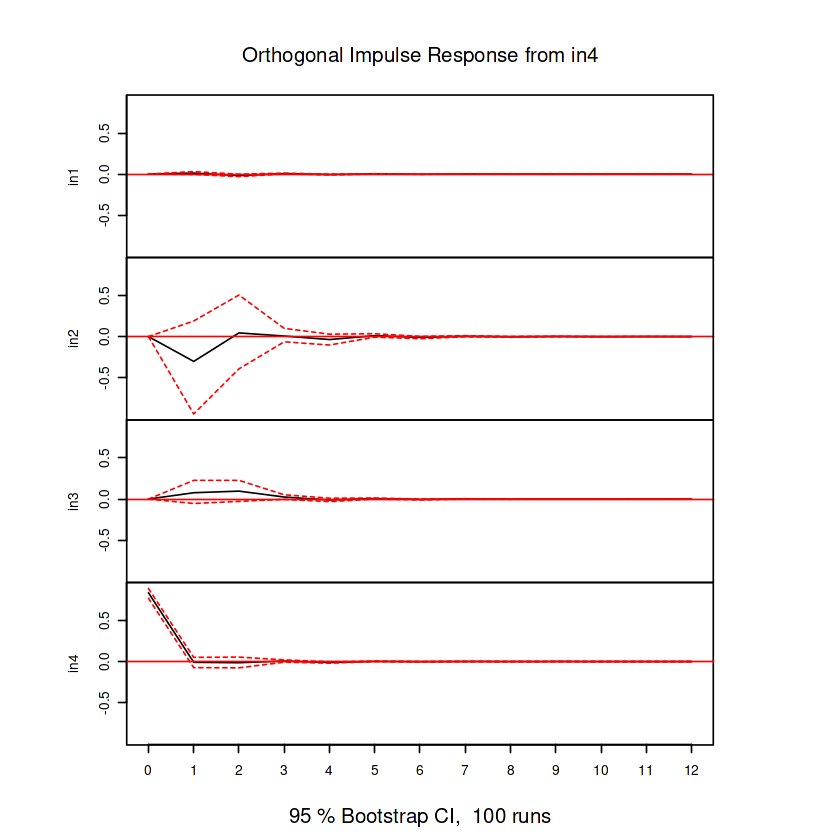

In [73]:
# La función de impulso respuesta se lleva a cabo mediante la librería de vars.
m1irf = irf(m0, n.ahead = 12, boot = TRUE)
plot(m1irf) 

Variaciones de la variable in1 genera cambios en el resto de variables (in2, in3 e in4)

**Predicción**

In [184]:
# Generación de la predicción al segundo modelo

predm2=VARpred(m2, 65)  #Generar un pronóstico de 47 períodos
var_est3 <- vars::VAR(y=combined_diff, lag.max = 2)
summary(var_est3)
     

orig  932 
Forecasts at origin:  932 
             in1 in2        in3        in4
 [1,] -6.533e-03   0  1.934e-01 -1.098e-01
 [2,] -6.535e-03   0  7.802e-05  2.280e-02
 [3,]  1.446e-03   0 -1.197e-02 -9.852e-03
 [4,] -2.391e-03   0  2.424e-03 -2.196e-03
 [5,]  8.605e-04   0  1.992e-04  9.594e-04
 [6,] -6.742e-04   0 -9.390e-04 -8.986e-04
 [7,]  2.781e-04   0  6.207e-04  2.809e-04
 [8,] -1.876e-04   0 -3.320e-04 -1.891e-04
 [9,]  8.729e-05   0  1.749e-04  6.877e-05
[10,] -5.466e-05   0 -9.016e-05 -4.983e-05
[11,]  2.737e-05   0  4.896e-05  2.237e-05
[12,] -1.625e-05   0 -2.684e-05 -1.478e-05
[13,]  8.470e-06   0  1.485e-05  7.249e-06
[14,] -4.868e-06   0 -8.209e-06 -4.391e-06
[15,]  2.596e-06   0  4.530e-06  2.255e-06
[16,] -1.465e-06   0 -2.495e-06 -1.309e-06
[17,]  7.922e-07   0  1.375e-06  6.920e-07
[18,] -4.425e-07   0 -7.567e-07 -3.930e-07
[19,]  2.411e-07   0  4.168e-07  2.114e-07
[20,] -1.339e-07   0 -2.295e-07 -1.186e-07
[21,]  7.329e-08   0  1.264e-07  6.443e-08
[22,] -4.056e-08


VAR Estimation Results:
Endogenous variables: in1, in2, in3, in4 
Deterministic variables: const 
Sample size: 930 
Log Likelihood: -6346.802 
Roots of the characteristic polynomial:
0.5629 0.412 0.2887 0.2887 0.2812 0.2812 0.1802 0.1441
Call:
vars::VAR(y = combined_diff, lag.max = 2)


Estimation results for equation in1: 
in1 = in1.l1 + in2.l1 + in3.l1 + in4.l1 + in1.l2 + in2.l2 + in3.l2 + in4.l2 + const 

         Estimate Std. Error t value Pr(>|t|)    
in1.l1 -1.387e-01  4.146e-02  -3.345 0.000855 ***
in2.l1  3.553e-04  1.149e-03   0.309 0.757293    
in3.l1 -1.614e-03  4.517e-03  -0.357 0.721017    
in4.l1  1.487e-02  1.012e-02   1.470 0.141930    
in1.l2  2.743e-01  4.161e-02   6.593 7.27e-11 ***
in2.l2 -2.104e-03  1.150e-03  -1.830 0.067595 .  
in3.l2 -7.818e-05  4.512e-03  -0.017 0.986179    
in4.l2 -1.894e-02  1.009e-02  -1.876 0.060927 .  
const  -5.814e-03  8.501e-03  -0.684 0.494229    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard 

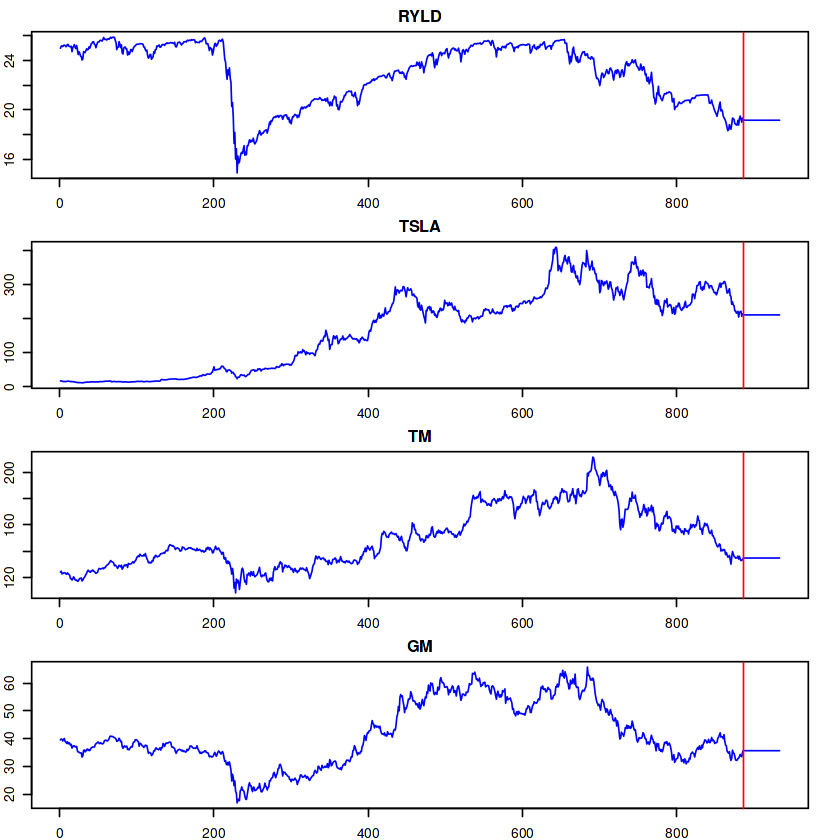

In [185]:

# Suponiendo que ya tienes:
# combined_diff: la serie diferenciada
# combined: la serie original
# predm2: la predicción del modelo VAR sobre la serie diferenciada

# Obtener predicciones de la serie diferenciada
m.ft_df <- predm2$pred     # Matriz con pronósticos de diferencias
nhor <- 47                 # Número de períodos a predecir
nr_lev <- nrow(combined)   # Tamaño de la serie original

# Crear matriz para guardar la serie "reconstruida" (original + predicción)
m.varf_lev_ft <- matrix(NA, nrow = nr_lev + nhor, ncol = ncol(m.ft_df))

# Pegar los datos originales al inicio
m.varf_lev_ft[1:nr_lev, ] <- as.matrix(combined[, sapply(combined, is.numeric)])

# Reconstruir la serie original desde la predicción de las diferencias
for(h in (nr_lev + 1):(nr_lev + nhor)) {
  hf <- h - nr_lev
  m.varf_lev_ft[h, ] <- m.varf_lev_ft[h - 1, ] + m.ft_df[hf, ]
}

# Visualización
str.main <- colnames(combined)[sapply(combined, is.numeric)]
par(mfrow = c(length(str.main), 1), mar = c(2, 2, 2, 2))

for(i in 1:length(str.main)) {
  df <- m.varf_lev_ft[, i]
  matplot(df, type = "l", col = "blue", main = str.main[i])
  abline(v = nr_lev, col = "red")  # Línea que separa la serie original del pronóstico
}


In [186]:
colnames(prices_varios_indexado)

[1] "Index" "RYLD"  "TSLA"  "TM"    "GM"

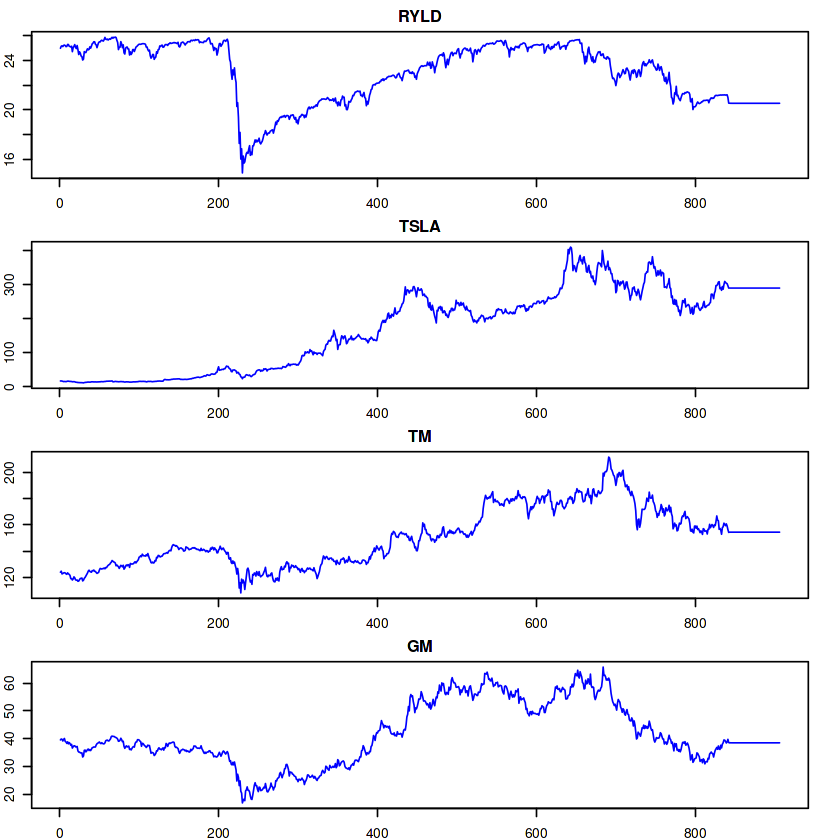

In [199]:
# prices_varios_indexado

library(tsibble)

# Asegúrate de tener una columna de fecha, por ejemplo "date"
# Y que esté en formato Date/POSIXct
prices_varios_indexado1 <- as_tsibble(prices_varios_indexado_train, index = "Index")

# Suponiendo que combined es un xts/zoo con fechas
dates_original <- prices_varios_indexado1$Index
freq <- periodicity(prices_varios_indexado1)$frequency

# Obtener predicciones de la serie diferenciada
m.ft_df <- predm2$pred     # Matriz con pronósticos de diferencias
nhor <- nrow(prices_varios_indexado_test)+20      # Número de períodos a predecir
nr_lev <- nrow(prices_varios_indexado_train)   # Tamaño de la serie original

# Generar fechas futuras (asumiendo frecuencia mensual)
dates_future <- seq(from = tail(dates_original, 1) + 1, by = "days", length.out = nhor)

# Combinar fechas
dates_full <- c(dates_original, dates_future)

# Crear matriz extendida
m.varf_lev_ft <- matrix(NA, nrow = nr_lev + nhor, ncol = ncol(m.ft_df))
colnames(m.varf_lev_ft) <- colnames(prices_varios_indexado1)[sapply(prices_varios_indexado1, is.numeric)]

# Copiar datos originales
m.varf_lev_ft[1:nr_lev, ] <- as.matrix(prices_varios_indexado1[, sapply(prices_varios_indexado1, is.numeric)])

# Reconstruir niveles desde diferencias
for (h in (nr_lev + 1):(nr_lev + nhor)) {
  hf <- h - nr_lev
  m.varf_lev_ft[h, ] <- m.varf_lev_ft[h - 1, ] + m.ft_df[hf, ]
}

# Convertir a xts con fechas completas
m.varf_lev_xts <- xts(m.varf_lev_ft, order.by = dates_full)

# Visualización
str.main <- colnames(m.varf_lev_xts)
par(mfrow = c(length(str.main), 1), mar = c(2, 2, 2, 2))

for (i in 1:length(str.main)) {
  df <- m.varf_lev_xts[, i]
  matplot(df, type = "l", col = "blue", main = str.main[i])
}

In [200]:
head(m.ft_df)

in1,in2,in3,in4
-0.0065326694,0,1.933884e-01,-0.1097624736
-0.0065345736,0,7.802184e-05,0.0228018648
0.0014459964,0,-1.197041e-02,-0.0098515593
-0.0023913493,0,2.424250e-03,-0.0021963550
0.0008604695,0,1.992371e-04,0.0009594092
-0.0006742129,0,-9.390050e-04,-0.0008986425


In [201]:
head(m.varf_lev_xts)

             RYLD     TSLA     TM    GM
2019-04-22 24.995 17.51667 124.16 39.50
2019-04-23 25.157 17.59333 124.94 39.83
2019-04-24 25.189 17.24400 122.88 39.72
2019-04-25 25.130 16.50867 123.19 39.11
2019-04-26 25.225 15.67600 123.62 39.68
2019-04-29 25.250 16.09800 123.81 40.01

In [202]:
df_final <- data.frame(m.varf_lev_xts)
tail(df_final)

,RYLD,TSLA,TM,GM
,<dbl>,<dbl>,<dbl>,<dbl>
2022-10-20,20.53631,289.9133,154.5036,38.45117
2022-10-21,20.53631,289.9133,154.5036,38.45117
2022-10-22,20.53631,289.9133,154.5036,38.45117
2022-10-23,20.53631,289.9133,154.5036,38.45117
2022-10-24,20.53631,289.9133,154.5036,38.45117
2022-10-25,20.53631,289.9133,154.5036,38.45117


In [203]:
tail(data.frame(prices_varios_indexado_test))

,Index,RYLD,TSLA,TM,GM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
881,2022-10-17,19.33,219.35,136.16,33.57
882,2022-10-18,19.50,220.19,134.26,34.25
883,2022-10-19,19.26,222.04,132.97,33.63
884,2022-10-20,19.01,207.28,133.24,33.44
885,2022-10-21,19.34,214.44,133.76,35.00
886,2022-10-24,19.18,211.25,134.74,35.72


In [204]:
library(dplyr)
library(xts)

df_final <- data.frame(m.varf_lev_xts)
colnames(df_final) <- paste0(colnames(df_final), "_proy")

# Extraer fechas del xts correctamente:
df_final$Index <- zoo::index(m.varf_lev_xts)

# Ahora unir con prices_varios_indexado_test (que debe tener también columna Index con fechas)
df_combinado <- left_join(prices_varios_indexado_test, df_final, by = "Index")
head(df_combinado)

,Index,RYLD,TSLA,TM,GM,RYLD_proy,TSLA_proy,TM_proy,GM_proy
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-08-23,20.54,296.4533,153.48,38.56,20.54347,289.9133,154.5134,38.44024
2,2022-08-24,20.62,297.0967,154.50,39.25,20.53693,289.9133,154.5135,38.46304
3,2022-08-25,20.80,296.0700,156.00,40.39,20.53838,289.9133,154.5015,38.45319
4,2022-08-26,20.45,288.0900,151.77,39.23,20.53599,289.9133,154.5039,38.45099
5,2022-08-29,20.35,284.8200,151.77,39.51,20.53645,289.9133,154.5038,38.45133
6,2022-08-30,20.10,277.7000,150.17,39.13,20.53626,289.9133,154.5035,38.45114


In [209]:
head(df_combinado,60)

,Index,RYLD,TSLA,TM,GM,RYLD_proy,TSLA_proy,TM_proy,GM_proy
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-08-23,20.54,296.4533,153.48,38.56,20.54347,289.9133,154.5134,38.44024
2,2022-08-24,20.62,297.0967,154.50,39.25,20.53693,289.9133,154.5135,38.46304
3,2022-08-25,20.80,296.0700,156.00,40.39,20.53838,289.9133,154.5015,38.45319
4,2022-08-26,20.45,288.0900,151.77,39.23,20.53599,289.9133,154.5039,38.45099
5,2022-08-29,20.35,284.8200,151.77,39.51,20.53645,289.9133,154.5038,38.45133
6,2022-08-30,20.10,277.7000,150.17,39.13,20.53626,289.9133,154.5035,38.45114
7,2022-08-31,19.93,275.6100,149.37,38.21,20.53635,289.9133,154.5037,38.45121
8,2022-09-01,19.78,277.1600,146.80,38.56,20.53630,289.9133,154.5036,38.45116
9,2022-09-02,19.65,270.2100,145.56,38.47,20.53632,289.9133,154.5036,38.45118


In [218]:
# Calcular RMSE
library(Metrics)
print(paste('RMSE RYLD: ', rmse(df_combinado$RYLD,df_combinado$RYLD_proy)))
print(paste('RMSE TSLA: ', rmse(df_combinado$TSLA,df_combinado$TSLA_proy)))
print(paste('RMSE TM: ', rmse(df_combinado$TM,df_combinado$TM_proy)))
print(paste('RMSE GM: ', rmse(df_combinado$GM,df_combinado$GM_proy)))

[1] "RMSE RYLD:  1.28602637402894"
[1] "RMSE TSLA:  42.1579375413211"
[1] "RMSE TM:  15.5148240928931"
[1] "RMSE GM:  3.54494342178045"


In [217]:
# Calcular MAPE
print(paste('MAPE RYLD: ', mean(abs((df_combinado$RYLD-df_combinado$RYLD_proy) / df_combinado$RYLD)) * 100))
print(paste('MAPE TSLA: ', mean(abs((df_combinado$TSLA-df_combinado$TSLA_proy) / df_combinado$TSLA)) * 100))
print(paste('MAPE TM: ', mean(abs((df_combinado$TM-df_combinado$TM_proy) / df_combinado$TM)) * 100))
print(paste('MAPE GM: ', mean(abs((df_combinado$GM-df_combinado$GM_proy) / df_combinado$GM)) * 100))

[1] "MAPE RYLD:  5.88613442974371"
[1] "MAPE TSLA:  13.4574231786962"
[1] "MAPE TM:  10.2973646019139"
[1] "MAPE GM:  8.47338775654176"
